#Project objective

**Problem statement**

Predicting housing prices in real estate market proves essential in helping both buyers and sellers make better-informed decisions. For sellers, predictive model helps them to value houses and avoid under/overestimating the prices. In addition, this helps to reduce costs for realtor and save time for market research (https://scholar.smu.edu/cgi/viewcontent.cgi?article=1234&context=datasciencereview)

**Objective**

Build a model to predict housing prices in California based on some features such as geographical location, the number of rooms and the proximity to the ocean for a real estate agency in California, the US.

#Dataset understanding

This dataset is taken from Kaggle (https://www.kaggle.com/datasets/camnugent/california-housing-prices/) and is originated from the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'.

Data dictionary can be found here:


---

Feature and target relationship

**Target**: median_housing_price (in USD)

**Feature**:

There are 8 columns that can have effect on churn rate of customers and can be used as features: credit_score, age, tenure, balance, products_number, credit_card, active member and estimated salary

`housing_median_age`: the newer the houses, the more expensive they get

`total_rooms`: houses with more rooms might be priced higher

`total_bedrooms`: houses with more bedrooms might be priced higher

`median_income`: higher median income in a neighborhood might lead to a higher housing prices

`ocean_proximity`: houses nearer to the ocean are more expensive

The remaining features might have little to no effect on housing prices.



#Direction

##Order of processes

Some steps to be implemented to achieve the objective of this project:

1. EDA to understand data structure

2. Data pre-processing:
- Check and process null values
- Check duplicates
- Check data types
- Check outliers to get rid of them
- Encode `object` data

3. Create and train models

According to some research articles, the top 3 models to use for housing price predictions are Random Forest, Linear Regression and XGBoost so these models will be used and compared to see which offer the best results.

4. Evaluate, validate and improve models

This section attempts to further improve the existing models by validating the first result to see if the performance of models is stable. After that, finding the best parameters through hyperparameter tuning using OPTUNA.

5. Select the final model

6. Check feature importance by SHAP model to see which features influence the model's decision most to further improve the model



##Resources for this project

https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability - Feature importance using SHAP model

https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285 - Feature importance understanding

https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893 - Outliers

https://pdf.sciencedirectassets.com/280203/1-s2.0-S1877050920X00123/1-s2.0-S1877050920316318/main.pdf - Housing price prediction techniques

https://optuna.readthedocs.io/en/stable/tutorial/20_recipes/002_multi_objective.html#sphx-glr-tutorial-20-recipes-002-multi-objective-py - Multi-objective OPTUNA tuning

#EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# csv file named 'Data_Quest_2.cvs' in this folder
# link = 'https://drive.google.com/file/d/1SkMXo5W2cgtRyKZmcRKlRamm7mOY8T1W/view?usp=drive_link'

url = f'https://drive.google.com/uc?id=1SkMXo5W2cgtRyKZmcRKlRamm7mOY8T1W'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
display(df.sample(5))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12422,-116.23,33.71,17.0,4874.0,1349.0,5032.0,1243.0,2.4440,90000.0,INLAND
5982,-117.75,34.10,21.0,8069.0,2174.0,4369.0,2036.0,3.2756,156800.0,INLAND
9288,-122.41,38.07,20.0,4536.0,708.0,1812.0,701.0,6.0433,435900.0,NEAR BAY
15262,-117.27,33.03,19.0,2899.0,499.0,1356.0,512.0,4.8700,220900.0,NEAR OCEAN
16846,-122.41,37.62,49.0,1464.0,302.0,636.0,259.0,4.2500,284100.0,NEAR OCEAN


In [3]:
# check number of rows and columns
df.shape

(20640, 10)

In [4]:
# basic stats
display(df.describe())
display(df.describe(exclude = [int, float]))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


- The average housing age is about 29 years old
- Most houses are one hour away from the ocean (9136)
- The median house value is $206855.816909

In [5]:
# check general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


`total_rooms`, `total_bedrooms`, `population` and `households` should be integer data type instead of float

<Axes: >

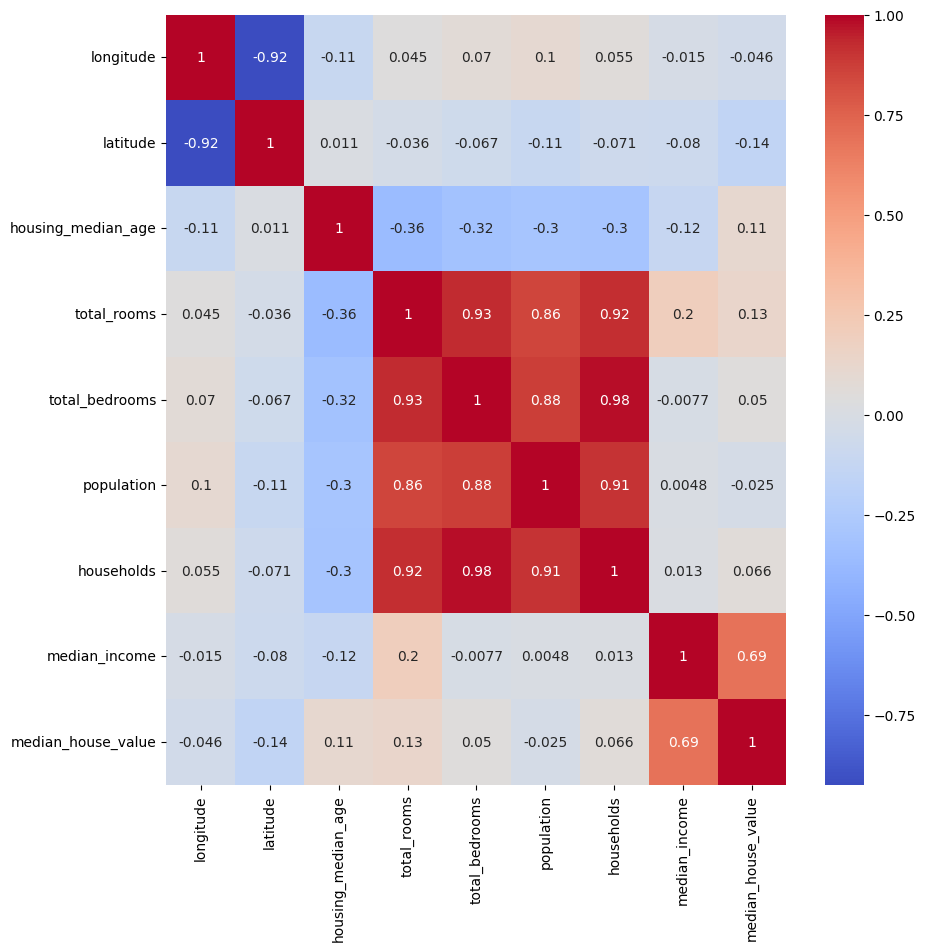

In [6]:
# check correl
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

- `median_income` has a significantly high correlation with `median_house_value`
- `housing_median_age` and `total_rooms` has a moderate correlation with `median_house_value`

#Data pre-processing

## Duplicates

In [7]:
# check duplicates
df.duplicated().sum()

0

##Null values

In [8]:
# check null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The column `total_bedrooms` has 207 null values, this will be replaced by using the most occurred value in this column (mode)

In [9]:
# fill null values
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mode()[0])

In [10]:
# re-check null values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

##Data types

In [11]:
# change data type
df['total_rooms'] = df['total_rooms'].astype(int)
df['total_bedrooms'] = df['total_bedrooms'].astype(int)
df['population'] = df['population'].astype(int)
df['households'] = df['households'].astype(int)

In [12]:
# re-check data types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

##Outliers

<Axes: >

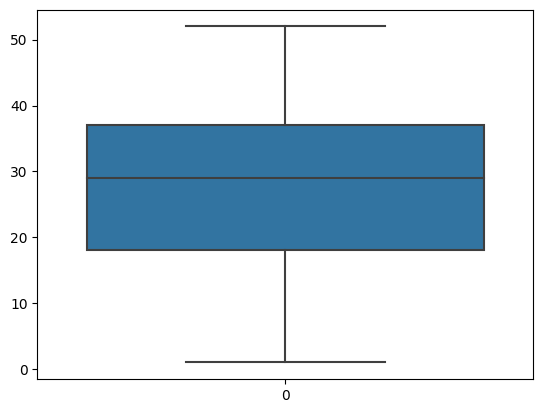

In [13]:
# check outlier for housing_median_age
sns.boxplot(df['housing_median_age'])

No outlier is found for `housing_median_age`

<Axes: >

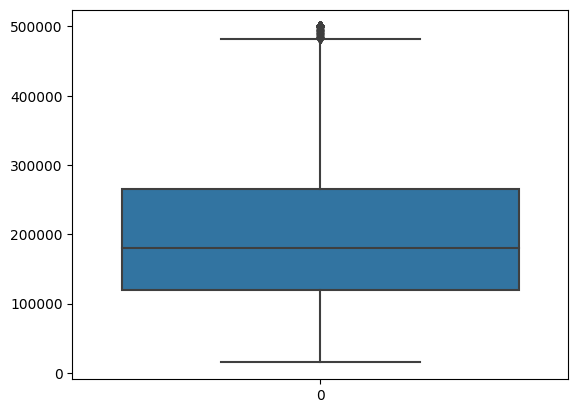

In [14]:
# check outlier for median_house_value
sns.boxplot(df['median_house_value'])

For this column, many outliers can be found above the range of 485000 and need to be treated to not affect the model's prediction

In [15]:
# use capping method to get rid of values above the 75th percentile for median_house_value variable
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['median_house_value']=np.where(df['median_house_value']>upper_whisker,upper_whisker,np.where(df['median_house_value']<lower_whisker,lower_whisker,df['median_house_value']))

<Axes: >

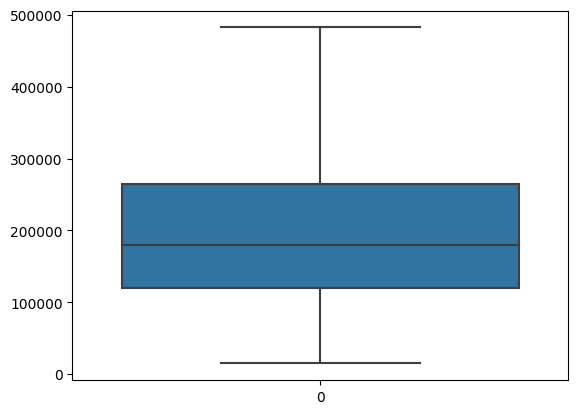

In [16]:
# re-check outlier for median_house_value
sns.boxplot(df['median_house_value'])

##Data encoding

For this part, the column `ocean_proximity` will be encoded manually based on the idea of ordinal encoding. The lower the number, the nearer the house is to the ocean (eg: ISLAND is 1 and INLAND is 5)

In [17]:
# creating a dictionary
my_dict = {'ISLAND': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, '<1H OCEAN' : 4, 'INLAND': 5}
# mapping values in column from dictionary
df['ocean_proximity_new'] = df.ocean_proximity.map(my_dict)
df = df.drop(['ocean_proximity'], axis=1)

In [18]:
# re-check the data
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_new
13978,-116.88,34.08,52.0,3419,777,710,265,3.9028,128600.0,5
16097,-122.50,37.75,45.0,1672,344,838,314,4.1419,291500.0,2
19726,-121.70,39.07,26.0,2668,510,1437,505,3.3125,100000.0,5
6085,-117.87,34.09,36.0,1267,191,640,200,5.2405,220000.0,4
1190,-121.46,39.40,17.0,3659,735,1970,667,2.4250,96200.0,5


##Download cleaned dataset

In [19]:
df.to_csv("housing_cleaned.csv", index=False)

#Linear Regression model

##Define features/ target

In [20]:
X = df.drop(columns = 'median_house_value')
y = df['median_house_value']

##Train-test split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape)

(14448, 9) (6192, 9)


##Scale data

In [22]:
from sklearn.preprocessing import StandardScaler
model_scale = StandardScaler()
model_scale.fit(X_train)
X_train_scale = model_scale.transform(X_train)
X_test_scale = model_scale.transform(X_test)
X_train_scale

array([[ 0.78093406, -0.80568191,  0.50935748, ..., -0.24350772,
         0.13350629,  0.04407534],
       [ 1.24526986, -1.33947268, -0.67987313, ..., -0.01326659,
        -0.53221805, -2.03019343],
       [-0.27755183, -0.49664515, -0.36274497, ..., -0.56532203,
         0.1709897 , -2.03019343],
       ...,
       [ 0.60119118, -0.75885816,  0.58863952, ...,  0.06784108,
        -0.49478713,  0.04407534],
       [-1.18625198,  0.90338501, -1.07628333, ...,  0.15156512,
         0.96717102,  0.04407534],
       [-1.41592345,  0.99235014,  1.85715216, ...,  1.93855026,
        -0.68320166, -0.99305905]])

##Train model

In [23]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train_scale, y_train)

LinearRegression()

##Evaluate model

###Train performance

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_train = model_lr.predict(X_train_scale)
r2_lr = r2_score(y_train, y_pred_train)
mae_lr = mean_absolute_error(y_train, y_pred_train)
mse_lr = mean_squared_error(y_train, y_pred_train)
rmse_lr = np.sqrt(mse_lr)
print('R2 score is {}'.format(r2_lr))
print('MAE is {}'.format(mae_lr))
print('RMSE is {}'.format(rmse_lr))

R2 score is 0.6393508362439722
MAE is 49813.14075529242
RMSE is 68171.03477188406


###Test performance

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_test = model_lr.predict(X_test_scale)
r2_lr = r2_score(y_test, y_pred_test)
mae_lr = mean_absolute_error(y_test, y_pred_test)
mse_lr = mean_squared_error(y_test, y_pred_test)
rmse_lr = np.sqrt(mse_lr)
print('R2 score is {}'.format(r2_lr))
print('MAE is {}'.format(mae_lr))
print('RMSE is {}'.format(rmse_lr))

R2 score is 0.6326774692049211
MAE is 50065.09313473808
RMSE is 68187.8424828684


#Random Forest model

##Train model

In [26]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scale, y_train)

RandomForestRegressor()

##Evaluate model

###Train performance

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_train = model_rf.predict(X_train_scale)
r2_rf = r2_score(y_train, y_pred_train)
mae_rf = mean_absolute_error(y_train, y_pred_train)
mse_rf = mean_squared_error(y_train, y_pred_train)
rmse_rf = np.sqrt(mse_rf)
print('R2 score is {}'.format(r2_rf))
print('MAE is {}'.format(mae_rf))
print('RMSE is {}'.format(rmse_rf))

R2 score is 0.9745415967593107
MAE is 11801.134152131783
RMSE is 18112.274938499522


###Test performance

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_test = model_rf.predict(X_test_scale)
r2_rf = r2_score(y_test, y_pred_test)
mae_rf = mean_absolute_error(y_test, y_pred_test)
mse_rf = mean_squared_error(y_test, y_pred_test)
rmse_rf = np.sqrt(mse_rf)
print('R2 score is {}'.format(r2_rf))
print('MAE is {}'.format(mae_rf))
print('RMSE is {}'.format(rmse_rf))

R2 score is 0.8190390533733921
MAE is 31436.625204295862
RMSE is 47860.31966772116


- The model is slightly overfit since the value of r2_score for test is lower than train
- The model's performance is good with the r2_score of 0.82
- However, based on MAE and RMSE, the predicted value deviates pretty much from the actual value, which presents a relatively high level of error and needs improvement

#XGBoost model

##Train model

In [29]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train_scale, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##Evaluate

###Train performance

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_train = model_xgb.predict(X_train_scale)
r2_xgb = r2_score(y_train, y_pred_train)
mae_xgb = mean_absolute_error(y_train, y_pred_train)
mse_xgb = mean_squared_error(y_train, y_pred_train)
rmse_xgb = np.sqrt(mse_xgb)
print('R2 score is {}'.format(r2_xgb))
print('MAE is {}'.format(mae_xgb))
print('RMSE is {}'.format(rmse_xgb))

R2 score is 0.9417191197086697
MAE is 19450.48534182932
RMSE is 27404.4110398726


###Test performance

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_test = model_xgb.predict(X_test_scale)
r2_xgb = r2_score(y_test, y_pred_test)
mae_xgb = mean_absolute_error(y_test, y_pred_test)
mse_xgb = mean_squared_error(y_test, y_pred_test)
rmse_xgb = np.sqrt(mse_xgb)
print('R2 score is {}'.format(r2_xgb))
print('MAE is {}'.format(mae_xgb))
print('RMSE is {}'.format(rmse_xgb))

R2 score is 0.8305717806526963
MAE is 31187.938694838096
RMSE is 46310.134098636714


- The model is slightly overfit since the value of r2_score for test is lower than train
- The model's performance is good with the r2_score of 0.83
- However, based on MAE and RMSE, the predicted value deviates pretty much from the actual value, which presents a relatively high level of error and needs improvement

#k-fold cross validation

##Linear Regression model

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_lr.fit(X_train_scale, y_train), X_train_scale, y_train, scoring = 'r2', cv = 10)
scores

array([0.6244579 , 0.64873342, 0.63008722, 0.6358492 , 0.67342866,
       0.6451179 , 0.67265784, 0.61024764, 0.58048997, 0.64230134])

In [33]:
print('The average r2 score is:', np.mean(scores))
print('Standard deviation of r2 score is:', np.std(scores))

The average r2 score is: 0.6363371066447254
Standard deviation of r2 score is: 0.02634634653109796


##Random Forest model

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_rf.fit(X_train_scale, y_train), X_train_scale, y_train, scoring = 'r2', cv = 10)
scores

array([0.80836379, 0.83788914, 0.79592299, 0.8077782 , 0.82697011,
       0.82361577, 0.84540614, 0.77475813, 0.8118738 , 0.82202824])

In [35]:
print('The average r2 score is:', np.mean(scores))
print('Standard deviation of r2 score is:', np.std(scores))

The average r2 score is: 0.8154606309180247
Standard deviation of r2 score is: 0.01950010885887552


##XGBoost model

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_xgb.fit(X_train_scale, y_train), X_train_scale, y_train, scoring = 'r2', cv = 10)
scores

array([0.80928115, 0.83537985, 0.81755821, 0.81921723, 0.83147017,
       0.83248192, 0.85412203, 0.78620979, 0.82181877, 0.82452475])

In [37]:
print('The average r2 score is:', np.mean(scores))
print('Standard deviation of r2 score is:', np.std(scores))

The average r2 score is: 0.8232063845749217
Standard deviation of r2 score is: 0.016948260392988725


##k-fold cross validation comparison

Model                 | Average r2 score     | Standard deviation
----------------------|----------------------|-------------------------
Linear Regression     | 0.64                 | 0.026
Random Forest         | 0.81                 | 0.019
XGBoost               | 0.82                 | 0.017

=> Since the r2 score for Linear Regression model is quite low and std is the highest amongst all three models, it will be dropped. Random Forest and XGBoost demonstrate high r2 scores with pretty small std after 10-fold cross validation so they will be tuned and adjusted further to see which model produce a better performance in the end.


#Hyperparameter tuning (OPTUNA)

In [38]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.7 MB/s eta 0:00:00


## Random Forest model tuning

In [39]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 700, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'random_state': 42
    }

    model_rf = RandomForestRegressor(**param)

    model_rf.fit(X_test_scale, y_test)

    y_pred_test = model_rf.predict(X_test_scale)

    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)

    return r2, mae

study = optuna.create_study(directions=["maximize", "minimize"])
study.optimize(objective, n_trials=10, timeout=600)
print("Number of finished trials: {}".format(len(study.trials)))
best_trials = study.best_trials

print("Best trials:")
for i, trial in enumerate(best_trials):
    print(f"Trial {i + 1}:")
    print("  R2 Value:", trial.values[0])
    print("  MAE Value:", trial.values[1])

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-11-09 09:41:37,102] A new study created in memory with name: no-name-21884206-c80a-4dd4-8bec-6747bbb40472
[I 2023-11-09 09:41:40,748] Trial 0 finished with values: [0.6196121017471774, 51966.13799300425] and parameters: {'n_estimators': 834, 'max_depth': 4, 'max_features': 'log2'}. 
[I 2023-11-09 09:41:52,867] Trial 1 finished with values: [0.9624141967418525, 15460.81625445445] and parameters: {'n_estimators': 977, 'max_depth': 16, 'max_features': 'log2'}. 
[I 2023-11-09 09:41:58,300] Trial 2 finished with values: [0.7587196521377171, 39940.158811795336] and parameters: {'n_estimators': 771, 'max_depth': 7, 'max_features': 'sqrt'}. 
[I 2023-11-09 09:42:14,618] Trial 3 finished with values: [0.8188469517439363, 33801.48360940711] and parameters: {'n_estimators': 858, 'max_depth': 8, 'max_features': 'auto'}. 
[I 2023-11-09 09:42:21,921] Trial 4 finished with values: [0.8946469241212927, 26087.861305464652] and parameters: {'n_estimators': 742, 'max_depth': 11, 'max_features': 'l

Number of finished trials: 10
Best trials:
Trial 1:
  R2 Value: 0.9708126922907654
  MAE Value: 13278.511085386453
  Params: 
    n_estimators: 835
    max_depth: 20
    max_features: sqrt


In [44]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 700, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'random_state': 42
    }

    model_rf = RandomForestRegressor(**param)

    model_rf.fit(X_test_scale, y_test)

    y_pred_test = model_rf.predict(X_test_scale)

    r2 = r2_score(y_test, y_pred_test)

    return r2

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-11-09 09:48:37,834] A new study created in memory with name: no-name-489d08e8-c072-472a-bc50-a9006b778ba4
[I 2023-11-09 09:48:43,690] Trial 0 finished with value: 0.7972404247415368 and parameters: {'n_estimators': 700, 'max_depth': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.7972404247415368.
[I 2023-11-09 09:48:58,753] Trial 1 finished with value: 0.8675398534657958 and parameters: {'n_estimators': 925, 'max_depth': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.8675398534657958.
[I 2023-11-09 09:49:21,266] Trial 2 finished with value: 0.8860865092653045 and parameters: {'n_estimators': 714, 'max_depth': 10, 'max_features': 'auto'}. Best is trial 2 with value: 0.8860865092653045.
[I 2023-11-09 09:49:31,115] Trial 3 finished with value: 0.9623605519546476 and parameters: {'n_estimators': 759, 'max_depth': 16, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.9623605519546476.
[I 2023-11-09 09:49:35,344] Trial 4 finished with value: 0.671869621387

Number of finished trials: 20
Best trial:
  Value: 0.9711096909717856
  Params: 
    n_estimators: 924
    max_depth: 20
    max_features: auto


###Recheck with new set of parameters

In [45]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=976, max_depth=18, max_features= 'auto')
model_rf.fit(X_train_scale, y_train)

RandomForestRegressor(max_depth=18, max_features='auto', n_estimators=976)

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_test = model_rf.predict(X_test_scale)
r2_rf = r2_score(y_test, y_pred_test)
mae_rf = mean_absolute_error(y_test, y_pred_test)
mse_rf = mean_squared_error(y_test, y_pred_test)
rmse_rf = np.sqrt(mse_rf)
print('R2 score is {}'.format(r2_rf))
print('MAE is {}'.format(mae_rf))
print('RMSE is {}'.format(rmse_rf))

R2 score is 0.8198885580746245
MAE is 31366.775572072347
RMSE is 47747.849558950904


###Result comparison
- first set of parameters: n_estimators=819, max_depth=20, max_features= 'auto'

=> R2 score is 0.8211388957351932; MAE is 31200.901596866202; RMSE is 47581.82760502815

- second set of parameters: n_estimators=919, max_depth=20, max_features= 'log2'

=> R2 score is 0.8175486270309316; MAE is 32024.272699721056; RMSE is 48057.00853333902

- third set of parameters: n_estimators=976, max_depth=18, max_features= 'auto'

=> R2 score is 0.8207143685904186; MAE is 31308.040828960988; RMSE is 47638.26191379223

##XGBoost model tuning

In [47]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 7.0, 17.0),
        'alpha': trial.suggest_loguniform('alpha', 7.0, 17.0),
        'eta': trial.suggest_categorical('eta', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'gamma': trial.suggest_categorical('gamma', [18, 19, 20, 21, 22, 23, 24, 25]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'colsample_bynode': trial.suggest_categorical('colsample_bynode', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 8, 600),
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7]),
        'subsample': trial.suggest_categorical('subsample', [0.5,0.6,0.7,0.8,1.0]),
        'random_state': 42
    }

    model_xgb = XGBRegressor(**param)

    model_xgb.fit(X_test_scale, y_test, verbose=False)

    y_pred_test = model_xgb.predict(X_test_scale)

    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)

    return r2, mae

study = optuna.create_study(directions=["maximize", "minimize"])
study.optimize(objective, n_trials=50, timeout=600)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
best_trials = study.best_trials

print("Best trials:")
for i, trial in enumerate(best_trials):
    print(f"Trial {i + 1}:")
    print("  R2 Value:", trial.values[0])
    print("  MAE Value:", trial.values[1])

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-11-09 09:56:31,940] A new study created in memory with name: no-name-f7e9f964-7c55-4e71-a8f1-ec67b5565898
[I 2023-11-09 09:56:32,227] Trial 0 finished with values: [0.7770578662714079, 37236.5774619721] and parameters: {'lambda': 14.182835043127117, 'alpha': 14.021018735387086, 'eta': 0.4, 'gamma': 18, 'learning_rate': 0.012, 'colsample_bytree': 0.9, 'colsample_bynode': 0.5, 'n_estimators': 414, 'min_child_weight': 102, 'max_depth': 5, 'subsample': 0.8}. 
[I 2023-11-09 09:56:32,717] Trial 1 finished with values: [0.7417311401736222, 41313.04767050731] and parameters: {'lambda': 8.055633736584422, 'alpha': 9.370065752931415, 'eta': 1.0, 'gamma': 21, 'learning_rate': 0.018, 'colsample_bytree': 0.3, 'colsample_bynode': 0.7, 'n_estimators': 933, 'min_child_weight': 293, 'max_depth': 7, 'subsample': 0.6}. 
[I 2023-11-09 09:56:33,045] Trial 2 finished with values: [0.7445172751072999, 40712.87532615169] and parameters: {'lambda': 11.460500356013627, 'alpha': 11.61508701052076, 'eta':

Number of finished trials: 50
Best trial:
Best trials:
Trial 1:
  R2 Value: 0.8797928210586854
  MAE Value: 26619.607281825338
  Params: 
    lambda: 10.359948044741252
    alpha: 7.280055896682849
    eta: 0.9
    gamma: 21
    learning_rate: 0.018
    colsample_bytree: 0.7
    colsample_bynode: 0.5
    n_estimators: 638
    min_child_weight: 31
    max_depth: 7
    subsample: 0.8


In [48]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 7.0, 17.0),
        'alpha': trial.suggest_loguniform('alpha', 7.0, 17.0),
        'eta': trial.suggest_categorical('eta', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'gamma': trial.suggest_categorical('gamma', [18, 19, 20, 21, 22, 23, 24, 25]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'colsample_bynode': trial.suggest_categorical('colsample_bynode', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 8, 600),
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7]),
        'subsample': trial.suggest_categorical('subsample', [0.5,0.6,0.7,0.8,1.0]),
        'random_state': 42
    }

    model_xgb = XGBRegressor(**param)

    model_xgb.fit(X_test_scale, y_test, verbose=False)

    y_pred_test = model_xgb.predict(X_test_scale)

    r2 = r2_score(y_test, y_pred_test)

    return r2

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-11-09 09:57:10,203] A new study created in memory with name: no-name-55c5cfdf-f4b3-4eec-a82f-71409da9e676
[I 2023-11-09 09:57:10,441] Trial 0 finished with value: 0.6628191722799346 and parameters: {'lambda': 13.514159006098039, 'alpha': 11.434062618214574, 'eta': 0.9, 'gamma': 21, 'learning_rate': 0.018, 'colsample_bytree': 0.6, 'colsample_bynode': 0.3, 'n_estimators': 503, 'min_child_weight': 476, 'max_depth': 5, 'subsample': 0.6}. Best is trial 0 with value: 0.6628191722799346.
[I 2023-11-09 09:57:11,036] Trial 1 finished with value: 0.8165944543278367 and parameters: {'lambda': 10.518860580510252, 'alpha': 10.360906147071807, 'eta': 0.5, 'gamma': 23, 'learning_rate': 0.012, 'colsample_bytree': 0.7, 'colsample_bynode': 0.4, 'n_estimators': 842, 'min_child_weight': 124, 'max_depth': 7, 'subsample': 0.7}. Best is trial 1 with value: 0.8165944543278367.
[I 2023-11-09 09:57:12,317] Trial 2 finished with value: 0.765605043551239 and parameters: {'lambda': 10.70974688281208, 'alph

Number of finished trials: 50
Best trial:
  Value: 0.8964797416351828
  Params: 
    lambda: 7.763416264720686
    alpha: 8.352811258117198
    eta: 0.4
    gamma: 25
    learning_rate: 0.016
    colsample_bytree: 1.0
    colsample_bynode: 0.9
    n_estimators: 717
    min_child_weight: 9
    max_depth: 6
    subsample: 0.8


###Recheck with new set of parameters

In [49]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(alpha= 7.239440325564794,
    eta= 1.0,
    gamma= 20,
    learning_rate= 0.016,
    colsample_bytree= 0.7,
    colsample_bynode= 0.9,
    n_estimators= 708,
    min_child_weight= 34,
    max_depth= 7,
    subsample= 0.7)
model_xgb.fit(X_train_scale, y_train)

XGBRegressor(alpha=7.239440325564794, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=0.9,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=1.0, eval_metric=None,
             feature_types=None, gamma=20, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.016, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=34, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=708,
             n_jobs=None, ...)

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_test = model_xgb.predict(X_test_scale)
r2_xgb = r2_score(y_test, y_pred_test)
mae_xgb = mean_absolute_error(y_test, y_pred_test)
mse_xgb = mean_squared_error(y_test, y_pred_test)
rmse_xgb = np.sqrt(mse_xgb)
print('R2 score is {}'.format(r2_xgb))
print('MAE is {}'.format(mae_xgb))
print('RMSE is {}'.format(rmse_xgb))

R2 score is 0.8362207145989637
MAE is 30531.588693071706
RMSE is 45531.57267548265


###Result comparison
- first set of parameters= alpha= 7.878941929196255,
    eta= 0.5,
    gamma= 19,
    learning_rate= 0.02,
    colsample_bytree= 0.8,
    colsample_bynode= 0.8,
    n_estimators= 998,
    min_child_weight= 25,
    max_depth= 7,
    subsample= 1.0

=> R2 score is 0.8452657288139025; MAE is 29457.516007297723; RMSE is 44256.434488837636

- second set of parameters= alpha=14.55361344517623,
    eta=0.5,
    gamma=21,
    learning_rate= 0.014,
    colsample_bytree= 0.7,
    colsample_bynode= 0.7,
    n_estimators= 795,
    min_child_weight= 27,
    max_depth= 6,
    subsample= 0.8

=> R2 score is 0.8292247990837467; MAE is 31415.037178768976; RMSE is 46493.85617031954

- third set of parameters= alpha= 7.239440325564794,
    eta= 1.0,
    gamma= 20,
    learning_rate= 0.016,
    colsample_bytree= 0.7,
    colsample_bynode= 0.9,
    n_estimators= 708,
    min_child_weight= 34,
    max_depth= 7,
    subsample= 0.7

=> R2 score is 0.8362207145989637; MAE is 30531.588693071706; RMSE is 45531.57267548265

##Model selection

After a series of tuning with single and multi-objectives in OPTUNA, XGBoost model displays a better and more consistent performance. As for Random Forest model, although r2 score improves by a little bit, its MAE and RMSE after tuning still stay pretty much the same or even increase. In addition, due to the long tuning time, trials for Random Forest model can only range from 10-20 times, which might not be optimal and show its best set of parameters. Meanwhile, XGBoost offers a better r2_score with lower MAE and RMSE in both single and multi-objective tuning and can handle more trials (100) within much less time.

Therefore, XGBoost model will be selected for this problem and its feature importance will be further analyzed to see if it can be further enhanced.

#Feature importance

In [51]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.5 MB/s eta 0:00:00


In [52]:
import shap
shap.initjs()

In [ ]:
# X_sampled = X_train.sample(1000, random_state=10)

In [53]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer(X_train)

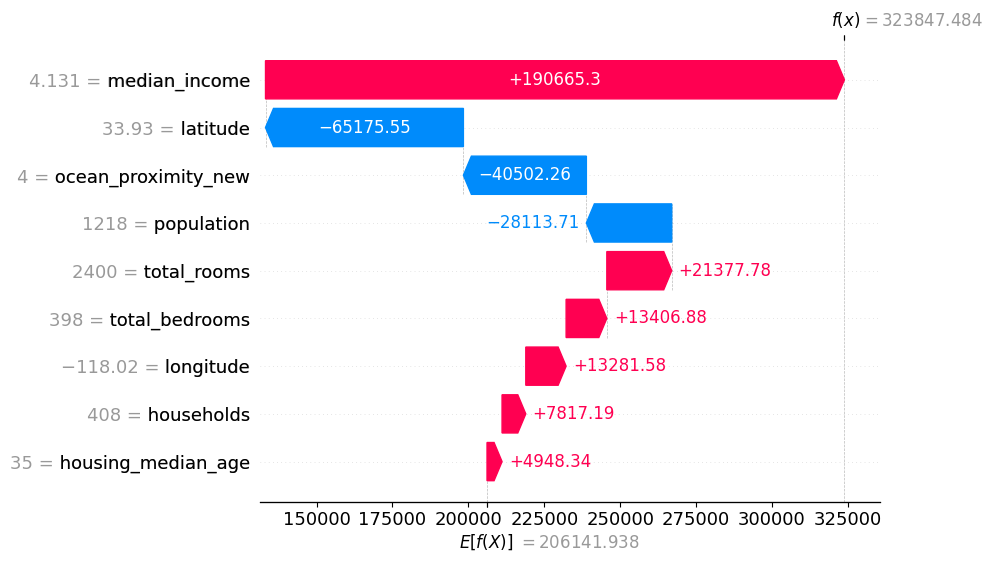

In [54]:
# waterfall plot
shap.plots.waterfall(shap_values[0])

In this waterfall plot, it can be observed that median_income positively contributes to the prediction and increases it by a large amount. Meanwhile, latitude and ocean_proximity negatively contribute to the prediction and decrease it by a certain amount.

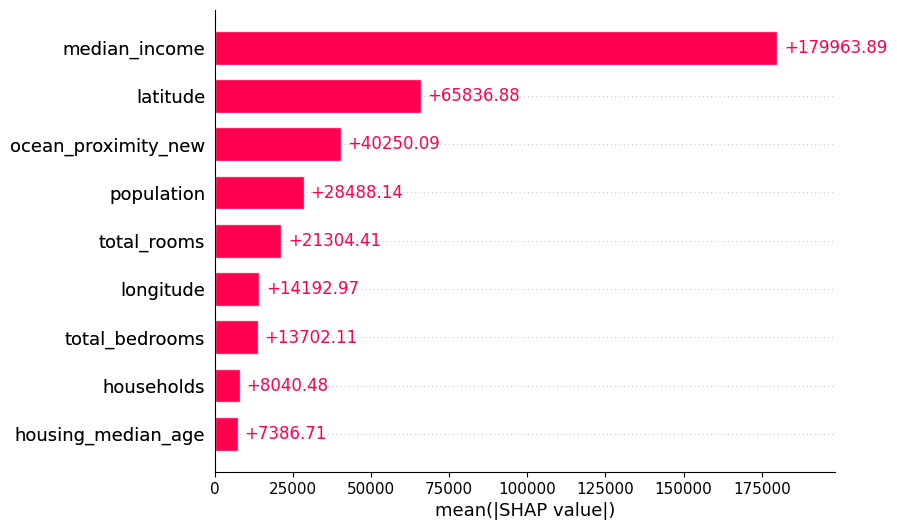

In [55]:
# absolute MEAN SHAP
shap.plots.bar(shap_values)

According to the aboslute mean SHAP plot, median_income, latitude and ocean_proximity are the three most important features affecting the decision of this model.

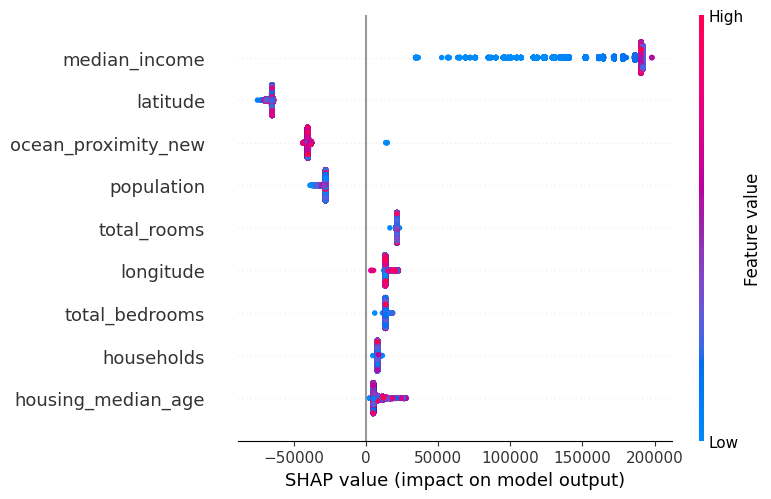

In [56]:
# beeswarm plot
shap.summary_plot(shap_values, X_train)

This beeswarm plot shows the behaviour of each feature as the value goes from low to high. In this plot, only the SHAP values of median_income and housing_median_age can be clearly inferred. Both features are positively correlated with the target variable (the higher the feature values, the higher the SHAP values).

=> In this XGBRegressor model, total_bedrooms, households and housing_median_age seem to not too significantly impact the model's decision; therefore, these features will be dropped from the list of features to see how the model will perform.

#Retrain the model with fewer features

In [57]:
df2 = df.drop(columns = ['total_bedrooms', 'households', 'housing_median_age'])
df2.sample(10)

,longitude,latitude,total_rooms,population,median_income,median_house_value,ocean_proximity_new
4033,-118.55,34.17,2127,761,7.8392,482412.5,4
16583,-121.45,37.75,3846,2360,4.6173,164800.0,5
15896,-122.39,37.72,1609,1064,1.1125,206300.0,3
1893,-120.01,38.92,964,485,1.7188,96100.0,5
15557,-117.07,33.12,2474,1224,2.7216,146300.0,4
10669,-117.86,33.62,3166,1092,7.9367,482412.5,4
6919,-117.99,33.97,4078,1490,10.8034,482412.5,4
12721,-121.37,38.58,2839,1006,7.3343,280400.0,5
3840,-118.44,34.18,2077,1206,2.2326,221000.0,4
15767,-122.43,37.77,2685,1170,3.6894,418800.0,3


In [58]:
X2 = df2.drop(columns = 'median_house_value')
y2 = df2['median_house_value']

In [59]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)
print(X2_train.shape, X2_test.shape)

(14448, 6) (6192, 6)


In [60]:
from sklearn.preprocessing import StandardScaler
model_scale = StandardScaler()
model_scale.fit(X2_train)
X2_train_scale = model_scale.transform(X2_train)
X2_test_scale = model_scale.transform(X2_test)
X2_train_scale

array([[ 0.78093406, -0.80568191, -0.11324158, -0.18411678,  0.13350629,
         0.04407534],
       [ 1.24526986, -1.33947268, -0.21356615, -0.37619075, -0.53221805,
        -2.03019343],
       [-0.27755183, -0.49664515, -0.48263943, -0.61124018,  0.1709897 ,
        -2.03019343],
       ...,
       [ 0.60119118, -0.75885816, -0.25147682,  0.28773617, -0.49478713,
         0.04407534],
       [-1.18625198,  0.90338501,  0.42999055,  0.30615422,  0.96717102,
         0.04407534],
       [-1.41592345,  0.99235014,  0.73096426,  1.0446304 , -0.68320166,
        -0.99305905]])

In [61]:
from xgboost import XGBRegressor
model_xgb2 = XGBRegressor(alpha= 7.878941929196255,
    eta= 0.5,
    gamma= 19,
    learning_rate= 0.02,
    colsample_bytree= 0.8,
    colsample_bynode= 0.8,
    n_estimators= 998,
    min_child_weight= 25,
    max_depth= 7,
    subsample= 1.0)
model_xgb2.fit(X2_train_scale, y2_train)

XGBRegressor(alpha=7.878941929196255, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=0.8,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.5, eval_metric=None,
             feature_types=None, gamma=19, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=25, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=998,
             n_jobs=None, ...)

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y2_pred_test = model_xgb2.predict(X2_test_scale)
r2_xgb2 = r2_score(y2_test, y2_pred_test)
mae_xgb2 = mean_absolute_error(y2_test, y2_pred_test)
mse_xgb2 = mean_squared_error(y2_test, y2_pred_test)
rmse_xgb2 = np.sqrt(mse_xgb2)
print('R2 score is {}'.format(r2_xgb2))
print('MAE is {}'.format(mae_xgb2))
print('RMSE is {}'.format(rmse_xgb2))

R2 score is 0.8431880788000674
MAE is 29698.195393249352
RMSE is 44552.5640405182


After the 3 least significant features are dropped and XGBRegressor model is retrained with one of the tuned set of parameters, r2_score and RMSE seem to not change much as compared to before dropping these features.